In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [3]:
bike_sample = pd.read_csv('input_bike_sample.csv')

In [5]:
threshold = bike_sample['count'].quantile(0.75)
bike_sample['peak_day'] = (bike_sample['count'] > threshold).astype(int)

features = ['temperature', 'humidity', 'windspeed', 'season_Spring', 'season_Summer', 'season_Fall', 'season_Winter', 'workingday', 'weather']
X = bike_sample[features]
y = bike_sample['peak_day']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)


In [7]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"{model_name} Classification Report:")
    print(classification_report(y_true, y_pred))
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}\n")

evaluate_model(y_test, y_pred_log, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.96      0.86       261
           1       0.62      0.21      0.31        87

    accuracy                           0.77       348
   macro avg       0.70      0.58      0.59       348
weighted avg       0.74      0.77      0.72       348

Accuracy: 0.7701

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       261
           1       0.48      0.30      0.37        87

    accuracy                           0.74       348
   macro avg       0.64      0.60      0.60       348
weighted avg       0.71      0.74      0.72       348

Accuracy: 0.7443



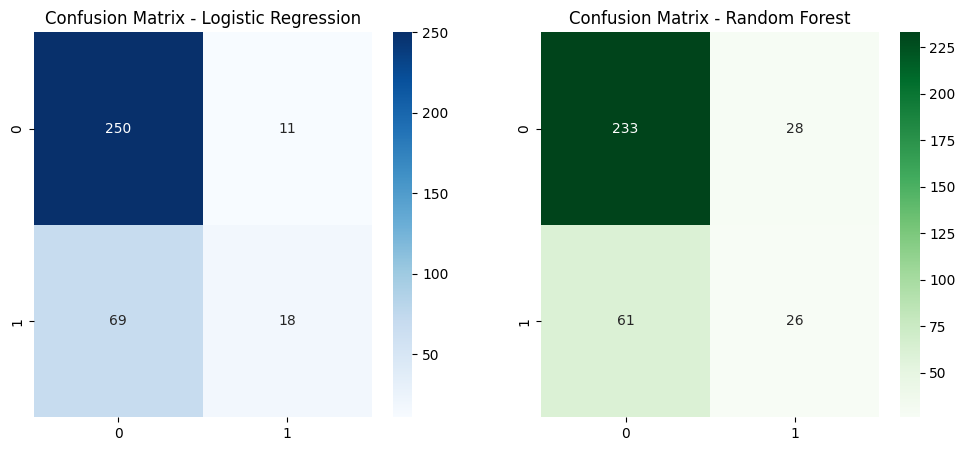

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix - Logistic Regression')
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens', ax=ax[1])
ax[1].set_title('Confusion Matrix - Random Forest')
plt.show()